# CEE 690, Lecture 11 Code Examples

This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

This is a partial set of codes to look at document analysis.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "11"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

## Load in a set of documents

In [7]:
from sklearn.datasets import fetch_20newsgroups

In [8]:
n_samples = 5000
n_features = 1000 # how many vocabulary words to keep.
n_components = 10
n_top_words = 20

In [9]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
# we're limiting the dataset to a subset for now to make things simpler
data_samples = dataset.data[:n_samples] 

In [10]:
dataset.target[3290]

2

In [11]:
dataset.target_names[2]

'comp.os.ms-windows.misc'

In [12]:
print(data_samples[3290])

As the subjects says, Windows 3.1 keeps crashing (givinh me GPF) on me of  
late.  It was never a very stable package, but now it seems to crash every  
day.  The worst part about it is that it does not crash consistently: ie I  
can't reproduce crashes, and they are not always GPF's in the same  
application. Sometimes I can recover by simply closing the application  
that caused an error, but other times, windows acts very strange, and I  
need to re-boot.

Some background:  I have a Leading Edge 486sx25 with Phoenix BIOS.  When I  
first got it it had 4Mg of memory.  It ran windows fine (not too many  
GPF's).  Then, a couple of weekends ago, I installed Lotus 123 for windows  
(with ATM), a game card and an additional 4  1Mg SIMMS.  The Leading edge  
machine is kind of strange, in that it has the IDE controler built into  
the motherboard, the CPU is actually on a sparate board that plugs into  
the motherboard and the SIMMS it uses are Macintosh SIMMS! Apparently I  
was told tha

Let's vectorize documents into word counts.

In [13]:
# sklearn has tools built in to facilitate text analysis

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
# tf is "term frequency"\
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

Let's look at what this document looks like once it's in a term frequency setup.

This uses a _sparse_ representation, so it shows up differently than our previous data objects.  Specifically, anything that isn't a zero doesn't show up.  A sparse array is stored differently in the computer, and can drastically reduce memory requirements and speed computations.  We won't be going into why.

In [16]:
type(tf)

scipy.sparse.csr.csr_matrix

In [17]:
tf.shape

(5000, 1000)

In [18]:
print(tf[3290])

  (0, 598)	1
  (0, 420)	1
  (0, 464)	2
  (0, 636)	1
  (0, 327)	1
  (0, 150)	2
  (0, 447)	1
  (0, 503)	1
  (0, 155)	2
  (0, 903)	1
  (0, 419)	2
  (0, 729)	2
  (0, 249)	1
  (0, 826)	1
  (0, 909)	1
  (0, 707)	1
  (0, 879)	1
  (0, 383)	3
  (0, 577)	1
  (0, 822)	1
  (0, 778)	1
  (0, 197)	2
  (0, 362)	2
  (0, 106)	2
  (0, 645)	1
  :	:
  (0, 900)	1
  (0, 832)	1
  (0, 428)	1
  (0, 549)	3
  (0, 233)	1
  (0, 575)	1
  (0, 493)	2
  (0, 195)	1
  (0, 708)	1
  (0, 785)	1
  (0, 180)	3
  (0, 21)	2
  (0, 543)	1
  (0, 265)	2
  (0, 398)	1
  (0, 296)	1
  (0, 297)	1
  (0, 523)	1
  (0, 92)	1
  (0, 610)	1
  (0, 75)	1
  (0, 399)	1
  (0, 736)	1
  (0, 896)	1
  (0, 705)	1


Which words are kept in our vectorizer?

This shows a learned dictionary.

In [19]:
tf_vectorizer.vocabulary_

{'sure': 873,
 'story': 859,
 'did': 282,
 'statement': 854,
 'media': 572,
 'pro': 705,
 'israeli': 477,
 'world': 986,
 'having': 421,
 'letter': 516,
 'try': 914,
 'think': 896,
 'reason': 736,
 'report': 753,
 'clearly': 210,
 'reports': 754,
 'received': 739,
 'government': 401,
 'makes': 556,
 'away': 133,
 'look': 536,
 'jews': 483,
 'got': 399,
 'power': 694,
 'expect': 339,
 'people': 661,
 'read': 732,
 'faq': 347,
 'actually': 75,
 'accept': 70,
 'hard': 418,
 'atheism': 126,
 'need': 610,
 'little': 529,
 'faith': 345,
 'runs': 775,
 'sorry': 836,
 'oh': 632,
 'just': 486,
 'end': 320,
 'maybe': 568,
 'start': 851,
 'new': 615,
 'newsgroup': 617,
 'alt': 92,
 'won': 977,
 'big': 148,
 'don': 299,
 'points': 681,
 'like': 523,
 'know': 495,
 'ask': 122,
 'question': 724,
 'sort': 837,
 'want': 954,
 'israel': 476,
 'stop': 858,
 'asking': 124,
 'questions': 725,
 'work': 982,
 'bad': 136,
 'attack': 127,
 'group': 406,
 'stupid': 864,
 'center': 189,
 'policy': 683,
 'resear

Using raw counts can sometimes be problematic, so let's try using the "inverse document frequency" to normalize:

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

Once we've used the tfidf transform, our data is real numbers or zeros rather than counts.

In [21]:
tfidf[42]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [22]:
print(tfidf[42])

  (0, 615)	0.0821244428790619
  (0, 299)	0.1384123997239606
  (0, 122)	0.22766802388125532
  (0, 724)	0.09968720431977503
  (0, 954)	0.08551727405031065
  (0, 114)	0.11788376471063036
  (0, 566)	0.11661857030662982
  (0, 621)	0.1349869966120939
  (0, 634)	0.1222743103019462
  (0, 783)	0.0886345706737303
  (0, 889)	0.12970852645206213
  (0, 372)	0.12823720586446566
  (0, 317)	0.14447430721605478
  (0, 527)	0.12823720586446566
  (0, 123)	0.1266171801622682
  (0, 691)	0.1222743103019462
  (0, 622)	0.11541057976996234
  (0, 138)	0.10983432325263938
  (0, 773)	0.10688736454804496
  (0, 336)	0.5363242848292363
  (0, 787)	0.14491600719203854
  (0, 680)	0.09330142820766828
  (0, 275)	0.1320795404639739
  (0, 893)	0.14582193259682333
  (0, 257)	0.11631141473942672
  (0, 607)	0.13592471528670141
  (0, 502)	0.11182387361463345
  (0, 463)	0.266409707375779
  (0, 348)	0.10077464425909148
  (0, 290)	0.384711617593397
  (0, 237)	0.12078935939518975
  (0, 944)	0.08710716981343408
  (0, 465)	0.11677348

### Let's use pipelines and try document classification

In [23]:
# reloading data in a train-test format
remove=('headers', 'footers', 'quotes')
data_train = fetch_20newsgroups(subset='train',
                                shuffle=True, random_state=42,
                                remove=remove)
X_train=data_train.data
y_train=data_train.target

data_valid = fetch_20newsgroups(subset='test',
                               shuffle=True, random_state=42,
                               remove=remove)
X_valid=data_valid.data
y_valid=data_valid.target

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
vectorizer = TfidfVectorizer(min_df=3, max_features=None,
 token_pattern=r'\w+',
 strip_accents='unicode', analyzer='word',
 ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
 stop_words='english')
cls = LogisticRegression(C=10,penalty='l2',multi_class='auto',solver='sag')
pipe = pipeline.Pipeline([('vectorizer',vectorizer), ('cls',cls)])

In [25]:
from sklearn import metrics
pipe.fit(X_train,y_train)
predictions=pipe.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.6996813595326606


In [26]:
# this is a complicated function that is useful for showing confusion matricies.  
# feel free to use it, but we're not going to go through how it works.
from sklearn import metrics
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True                          ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    ##
    modified by dec18

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig=plt.figure(figsize=(18, 13))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+', Accuracy={:.2f}'.format(accuracy))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
    
    cmr=cm;
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cmr.max() / 1.5 if normalize else cmr.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=14)
        else:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=14)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    return fig

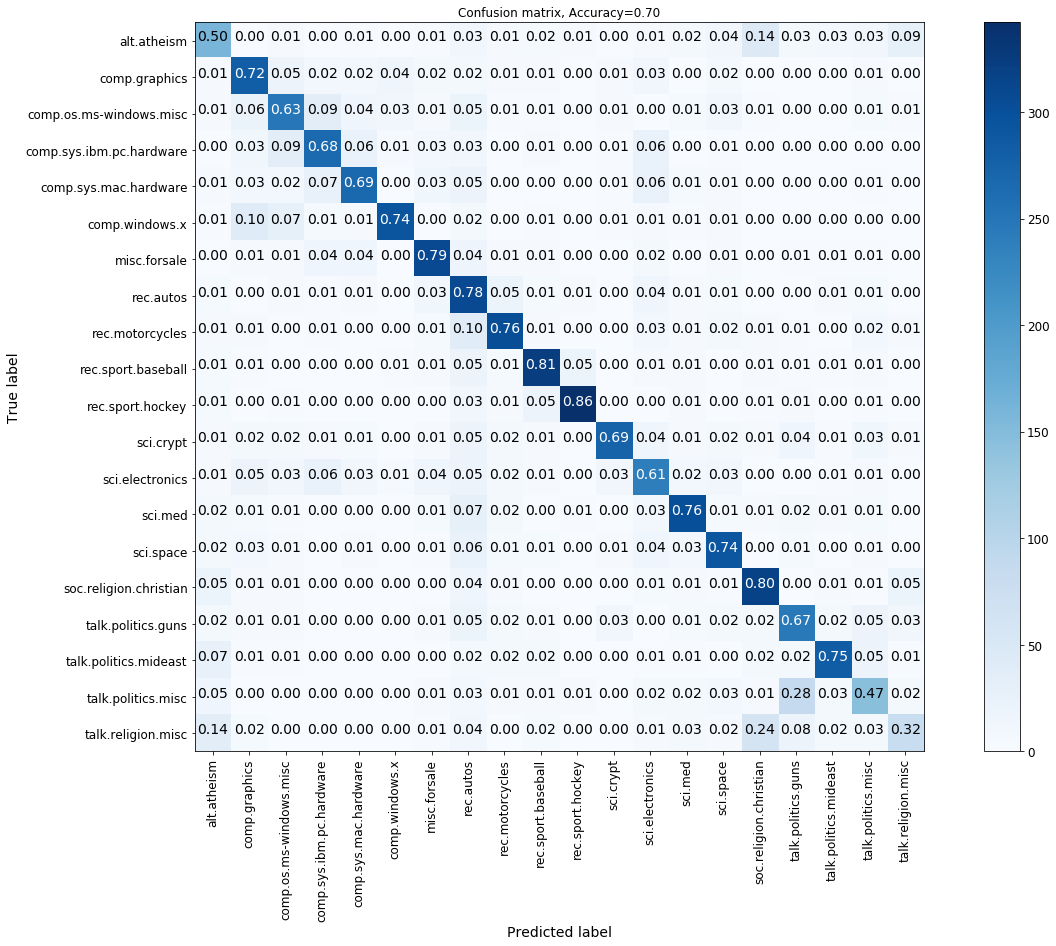

In [27]:
cm=metrics.confusion_matrix(y_valid, predictions)
fig=plot_confusion_matrix(cm,target_names=data_train.target_names)
savepdf(fig,'ridge_logistic')

Using a (linear) SVM instead

In [28]:
from sklearn import svm
vectorizer = TfidfVectorizer(min_df=3, max_features=None,
 token_pattern=r'\w+',
 strip_accents='unicode', analyzer='word',
 ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
 stop_words='english')
cls = svm.LinearSVC(C=0.1,tol=.01,multi_class='ovr')
pipe = pipeline.Pipeline([('vectorizer',vectorizer), ('cls',cls)])
pipe.fit(X_train,y_train)
predictions=pipe.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.701805629314923


#### Word Embeddings
I will not ask you to code with word embeddings, so below is just for educational fun.

In [29]:
# word vectors are not built into sklearn, so we have to download some
# Download word vectors
from urllib.request import urlretrieve
import os
if not os.path.isfile('mini.h5'):
    print("Downloading Conceptnet Numberbatch word embeddings...")
    conceptnet_url = 'http://conceptnet.s3.amazonaws.com/precomputed-data/2016/numberbatch/17.06/mini.h5'
    urlretrieve(conceptnet_url, 'mini.h5')
print('Complete.')

Complete.


In [30]:
# import the word embeddings
import numpy as np
import h5py
with h5py.File('mini.h5', 'r') as f:
    all_words = [word.decode('utf-8') for word in f['mat']['axis1'][:]]
    all_embeddings = f['mat']['block0_values'][:]
english_words = [word[6:] for word in all_words if word.startswith('/c/en/')]
english_word_indices = [i for i, word in enumerate(all_words) if word.startswith('/c/en/')]
english_embedddings = all_embeddings[english_word_indices]

Often we want to use normalized embeddings.

In [31]:
norms = np.linalg.norm(english_embedddings, axis=1)
normalized_embeddings = english_embedddings.astype('float32') / norms.astype('float32').reshape([-1, 1]) 

In [32]:
index = {word: i for i, word in enumerate(english_words)}
def similarity_score(w1, w2):
    score = np.dot(normalized_embeddings[index[w1], :], normalized_embeddings[index[w2], :])
    return score

def print_similarity(w1,w2):
    try:
        print('{0}\t{1}\t'.format(w1,w2), \
          similarity_score('{}'.format(w1), '{}'.format(w2)))
    except:
        print('One of the words is not in the dictionary.')
    return None

In [33]:
# A word is as similar with itself as possible:
print('cat\tcat\t', similarity_score('cat', 'cat'))
# Closely related words still get high scores:
print('cat\tfeline\t', similarity_score('cat', 'feline'))
print('cat\tdog\t', similarity_score('cat', 'dog'))
# Unrelated words, not so much
print('cat\tmoo\t', similarity_score('cat', 'moo'))
print('cat\tfreeze\t', similarity_score('cat', 'freeze'))

cat	cat	 1.0
cat	feline	 0.8199548
cat	dog	 0.590724
cat	moo	 0.0039538248
cat	freeze	 -0.030225184


##### Can we use this for document classification?
One approach is to take the average word embedding.

In [34]:
data_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [35]:
 import string
remove_punct=str.maketrans('','',string.punctuation)
# This function converts a line of our data file into
# a tuple (x, y), where x is 300-dimensional representation
# of the words in a review, and y is its label.
def convert_sentence_to_mean_embedding(doc):
    # Split the document into words using Python's split() function
    words = doc.translate(remove_punct).lower().split()
    # Look up the embeddings of each word, ignoring words not
    # in our ptrained vocabulary.
    embeddings = [english_embedddings[index[w]] for w in words
                  if w in index]
    # Take the mean of the embeddings
    if len(embeddings)>0:
        wv_mean = np.mean(np.vstack(embeddings), axis=0)
    else:
        wv_mean = np.zeros([300])
    return wv_mean

In [36]:
data_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [37]:
X_train=np.zeros([len(data_train.data),300])
for i,doc in enumerate(data_train.data):
    X_train[i]=convert_sentence_to_mean_embedding(doc)
X_valid=np.zeros([len(data_valid.data),300])
for i,doc in enumerate(data_valid.data):
    X_valid[i]=convert_sentence_to_mean_embedding(doc)

In [38]:
cls=LogisticRegression(solver='sag',tol=.01,multi_class='auto',class_weight=None)
cls.fit(X_train,y_train)
predictions=cls.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.6091343600637281


In [39]:
cls=svm.SVC(C=10.0,kernel='rbf',gamma='auto',tol=.01)
cls.fit(X_train,y_train)
predictions=cls.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.6096654275092936


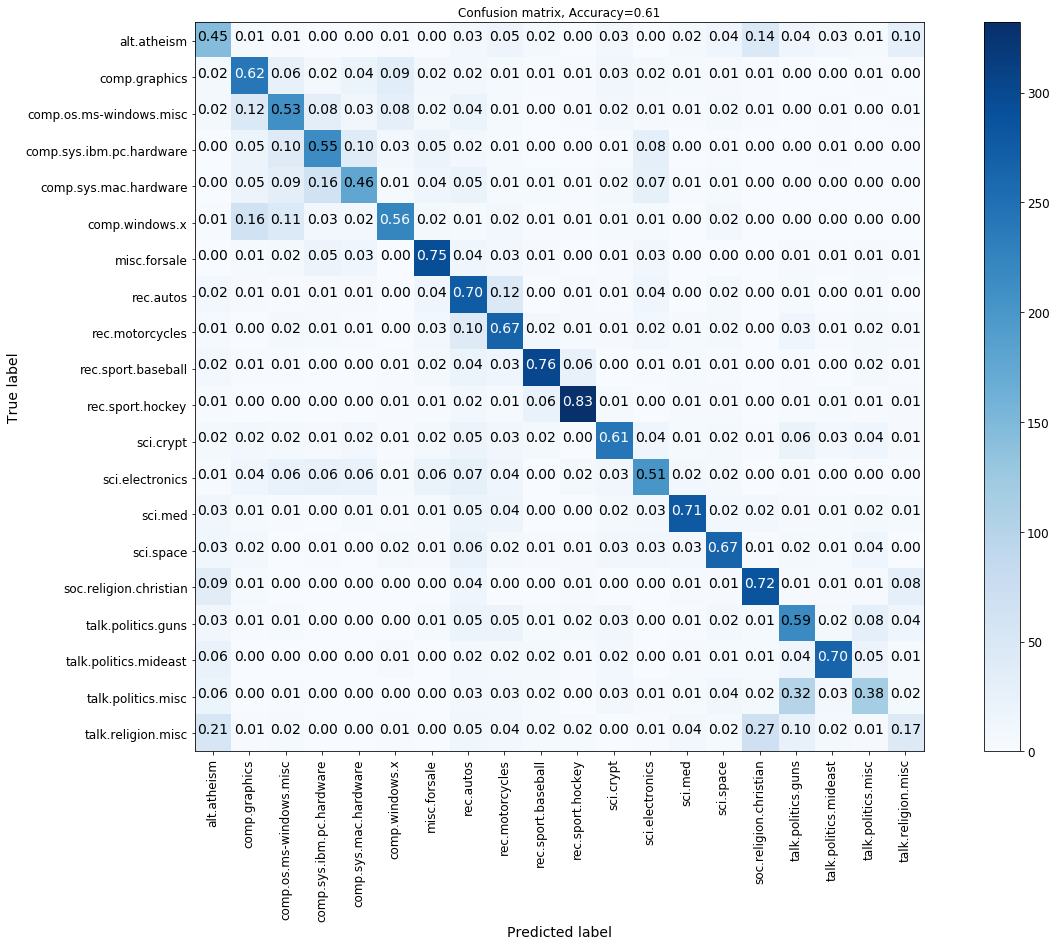

In [40]:
cm=metrics.confusion_matrix(y_valid, predictions)
fig=plot_confusion_matrix(cm,target_names=data_train.target_names)
savepdf(fig,'word_embeddings')

### On a sentiment analysis dataset:

In [41]:
docs=[]
labels=[]
enc = 'utf-8' # This is necessary in some environments
with open("data/movie-simple.txt", "r", encoding=enc) as f:
    for line in f.readlines():
        labels.append(int(line[0]))
        # Split the line into words using Python's split() function
        docs.append(line[4:-1].translate(remove_punct).lower())
labels=np.array(labels)

In [42]:
docs[:5]

['a couple of very liberal people i know thought brokeback mountain was  stupid exploitation',
 'brokeback mountain  is tragic but immensely wellexecuted never feeling moralistic',
 'brokeback mountain  was depressing but it was really good',
 'brokeback mountain  was extremely depressing',
 'brokeback mountain sucked']

td-idf

In [43]:
from sklearn import model_selection
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(docs,labels,random_state=42)

In [44]:
from sklearn import svm
vectorizer = TfidfVectorizer(min_df=3, max_features=None,
 token_pattern=r'\w+',
 strip_accents='unicode', analyzer='word',
 ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
 stop_words='english')
cls = svm.LinearSVC(C=0.1,tol=.01,multi_class='ovr')
pipe = pipeline.Pipeline([('vectorizer',vectorizer), ('cls',cls)])
pipe.fit(X_train,y_train)
predictions=pipe.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.9546742209631728


Word Embeddings

In [45]:
X=np.zeros([len(docs),300])
for i,doc in enumerate(docs):
    X[i]=convert_sentence_to_mean_embedding(doc)

In [46]:
from sklearn import model_selection
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,labels,random_state=42)

In [47]:
cls=LogisticRegression(solver='sag',tol=.01,multi_class='auto',class_weight=None)
cls.fit(X_train,y_train)
predictions=cls.predict(X_valid)
print('The accuracy is {}'.format(metrics.accuracy_score(y_valid,predictions)))

The accuracy is 0.9348441926345609
